In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  scipy.stats as scipy
df=pd.read_csv("loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
df.shape

(614, 13)

In [26]:
df.head

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

In [28]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [30]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 2.Data Cleaning

In [37]:
### Handle missing values
df['Dependents']=df['Dependents'].replace('3+',3)
df['Dependents']=df['Dependents'].fillna(0)
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median(0))
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(360)
df['Credit_History']=df['Credit_History'].fillna(1)
df['Gender']=df['Gender'].fillna('Male')
df['Married']=df['Married'].fillna('No')
df['Self_Employed']=df['Self_Employed'].fillna('No')
print("\nMissing values after cleaning:")col
print(df.isnull().sum().sum())
                                    


Missing values after cleaning:
0


### 3.Univariate Analysis:

In [ ]:
cols=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
plt.figure(figsize=(15,10))
for i,col in enumerate(cols,1):
    plt.subplot(3,3,i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()

### Numerical Variables:

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       614.000000         614.000000  614.000000        614.000000
mean       5403.459283        1621.245798  145.752443        342.410423
std        6109.041673        2926.248369   84.107233         64.428629
min         150.000000           0.000000    9.000000         12.000000
25%        2877.500000           0.000000  100.250000        360.000000
50%        3812.500000        1188.500000  128.000000        360.000000
75%        5795.000000        2297.250000  164.750000        360.000000
max       81000.000000       41667.000000  700.000000        480.000000


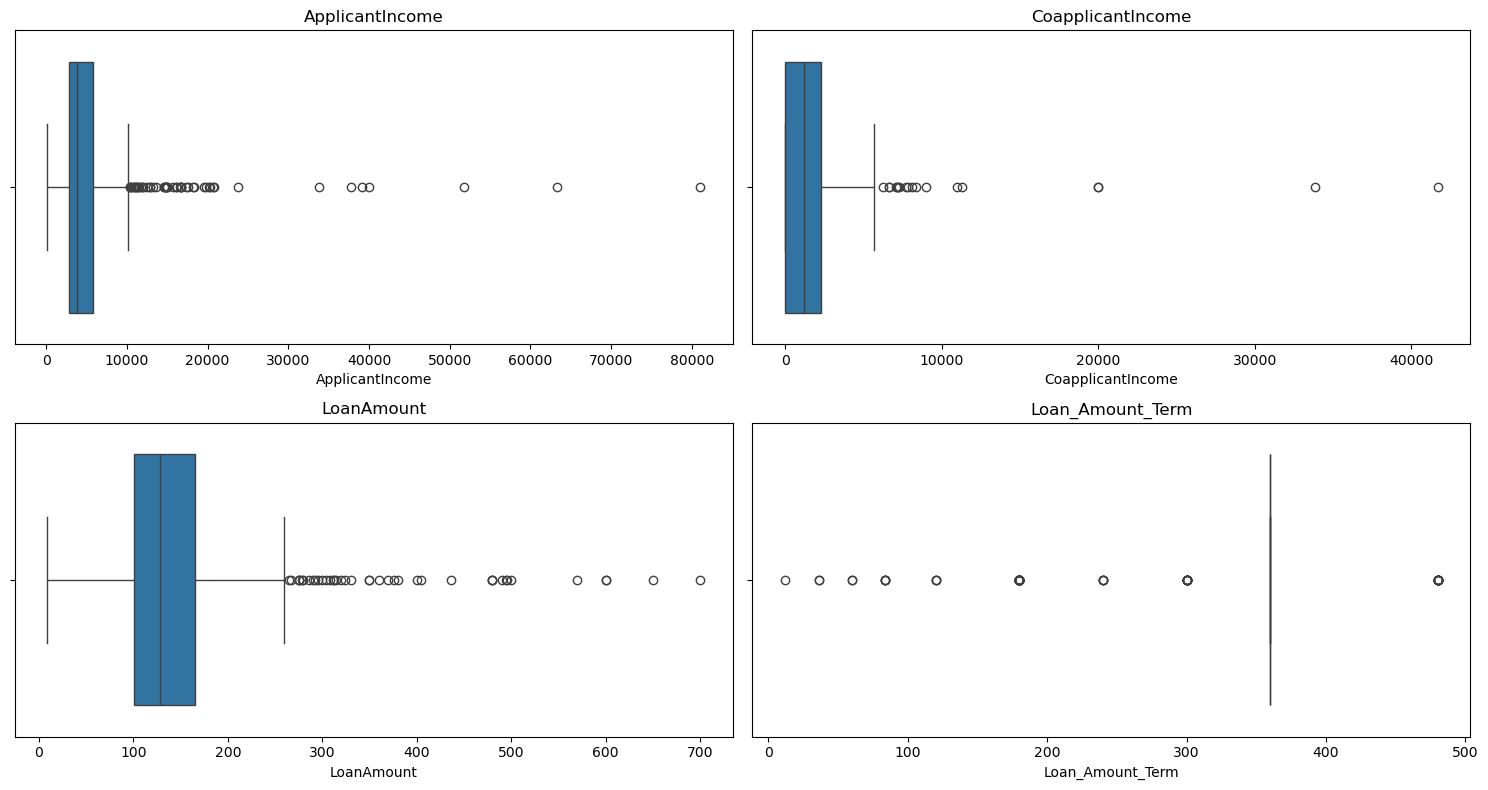

In [51]:
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
print(df[num_cols].describe())
plt.figure(figsize=(15,8))
for i,col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

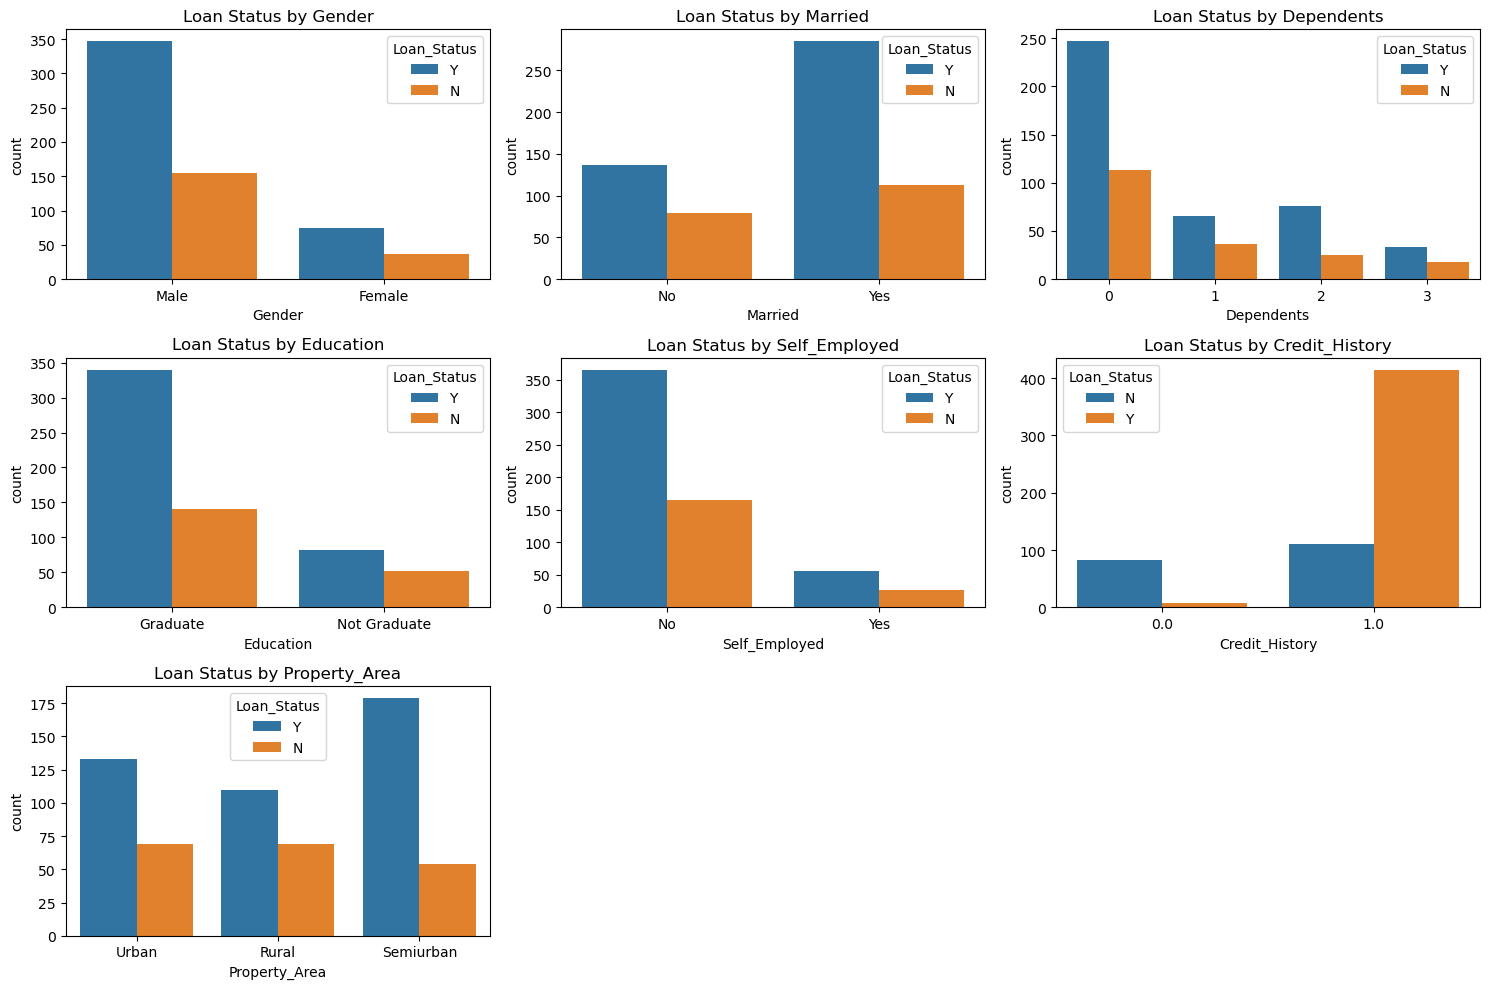

In [55]:
### Bivariate Analysis:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols[:-1], 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title(f'Loan Status by {col}')
plt.tight_layout()
plt.show()

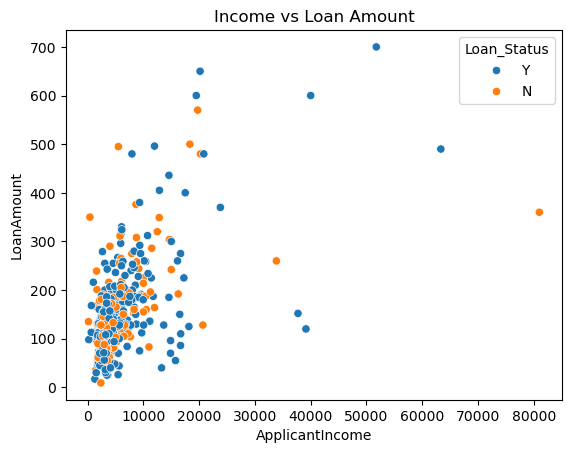

In [57]:
### Income vs Loan Amount:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Income vs Loan Amount')
plt.show()

### Correlation Analysis:

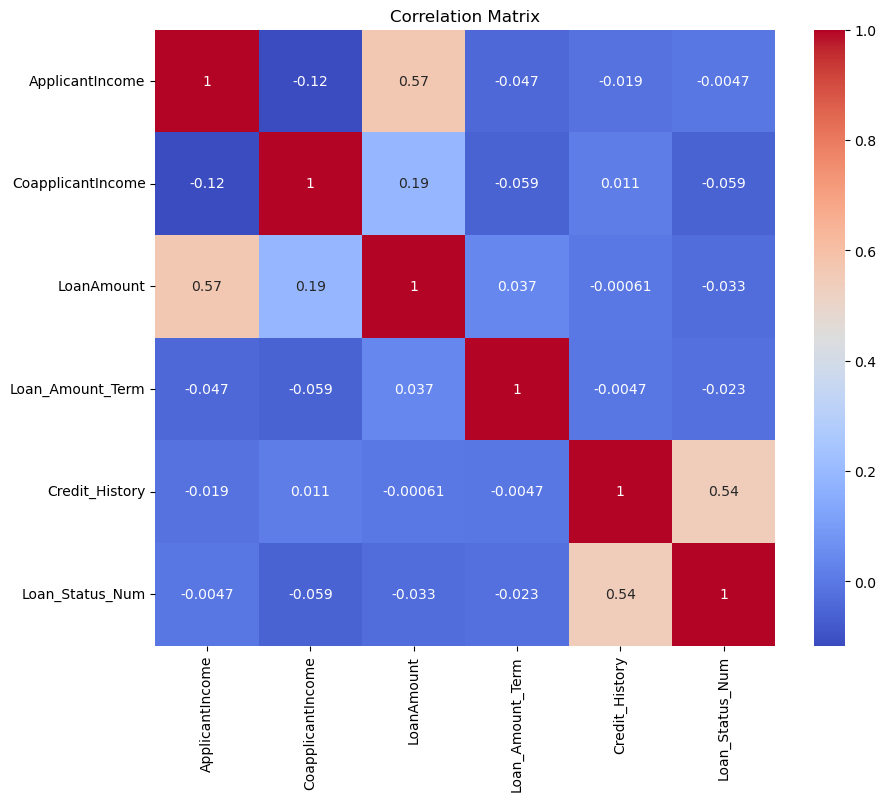

In [60]:
# Convert Loan_Status to numeric
df['Loan_Status_Num'] = df['Loan_Status'].map({'Y':1, 'N':0})

# Calculate correlations
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

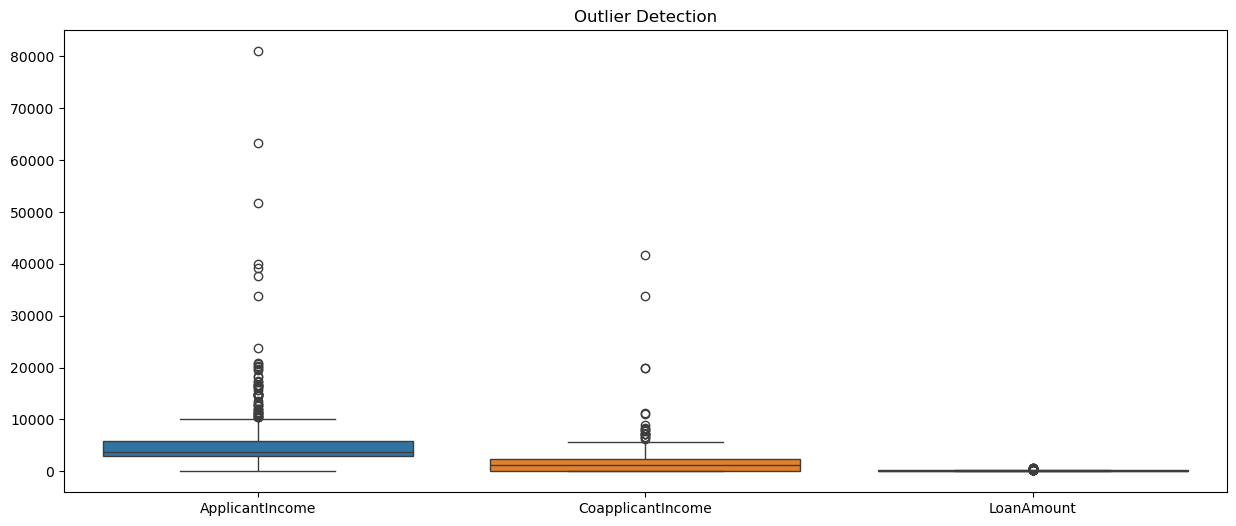


Top 5 highest incomes:
     ApplicantIncome  LoanAmount Loan_Status
409            81000       360.0           N
333            63337       490.0           Y
171            51763       700.0           Y
155            39999       600.0           Y
185            39147       120.0           Y


In [62]:
### Outlier Detection:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.title('Outlier Detection')
plt.show()

# Show extreme income cases
print("\nTop 5 highest incomes:")
print(df.nlargest(5, 'ApplicantIncome')[['ApplicantIncome', 'LoanAmount', 'Loan_Status']])